In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import statsmodels.api as sm
# import tushare as ts
# import QUANTAXIS as QA
# import talib as ta
import datetime,time
import pickle
from stock_util import get_trading_dates, dynamic_max_drawdown, compute_sharpe_ratio, compute_ir

In [2]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('ggplot')
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

In [3]:
def save_file(Account, name):
    
    with open(name, 'wb') as f:
        pickle.dump(Account, f)
    
def load_file(filename):
    with open(filename, 'rb') as f:
        Account = pickle.load(f)
        return Account
PATH = 'backtest_save/'

In [5]:

# files = os.listdir(f'{PATH}')
# os.listdir(PATH)

In [13]:
# for i in files:
# #     print(f'{PATH}{i}')
#     print(i[4:-3])

In [14]:
# account_test = load_file(f'{PATH}{files[0]}')
# account_test.keys()
# ser = pd.Series(account_test)
# ser.T.index

In [15]:
df = pd.DataFrame()
for ind,i in enumerate(files):
    account = load_file(f'{PATH}{i}')
    account['name'] = i[4:-3]
    
    drawdown = dynamic_max_drawdown(account['net_value'])
    annual_profit, sharpe_ratio = compute_sharpe_ratio(account['final_net_value'],
                                                       account['day_profit'])
    (cov, var_profit, var_hs300, alpha, beta, omega, ir) = compute_ir(account['day_profit'])
    account['positions'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
    account['net_value'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
    account['profit'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
    account['day_profit'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
    account['drawdown'] = drawdown
    account['drawdown'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
    
    account['annual_profit'] = annual_profit
    account['max_drawdown'] = drawdown.max()
    account['sharpe_ratio'] = sharpe_ratio
    
    account['ir'] = ir
    account['alpha'] = alpha
    account['beta'] = beta
    account['omega'] = omega
    account['cov'] = cov
    account['var_profit'] = var_profit
    account['var_hs300'] = var_hs300

    
    temp = pd.Series(account, name=ind)
    df = pd.concat([df, temp], axis=1, sort=True)
df = df.T
df.index.name = 'bt_id'

In [71]:
col_sorted = ['name', 'start', 'end', 'init_assets', 'final_net_value', 'position_manage', 'stop_loss',
'annual_profit', 'max_drawdown', 'sharpe_ratio', 'ir', 'alpha', 'beta',
'cov', 'var_profit', 'var_hs300', 'omega',
'positions', 'drawdown', 'net_value', 'profit', 'day_profit', 'history_table']
df = df.loc[:, col_sorted]

In [128]:
col_sorted[:-6]

['name',
 'start',
 'end',
 'init_assets',
 'final_net_value',
 'position_manage',
 'stop_loss',
 'annual_profit',
 'max_drawdown',
 'sharpe_ratio',
 'ir',
 'alpha',
 'beta',
 'cov',
 'var_profit',
 'var_hs300',
 'omega']

接下来就是计算，然后是画图

In [125]:
# plt.plot(df.profit[0].hs300, label='hs300')
# plt.plot(df.profit[0].profit, label=df.name[0])
# plt.legend(loc='best');

In [ ]:
plt.legend()

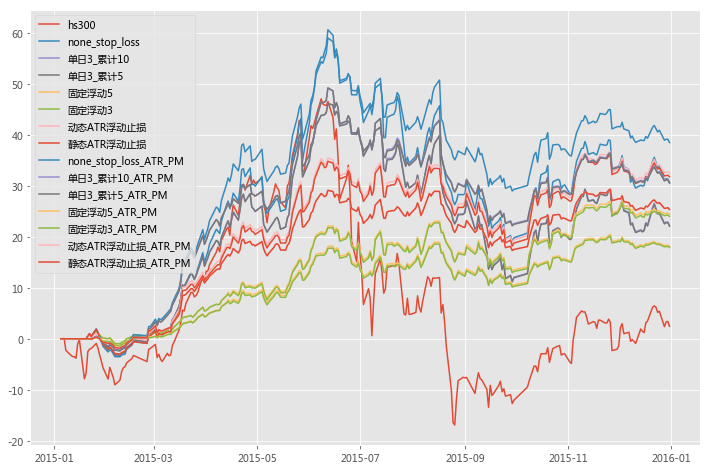

In [100]:
plt.plot(df.profit[0].hs300, label='hs300')
for i in range(df.shape[0]):
    plt.plot(df.profit[i].profit, label=df.name[i])
plt.legend(loc='best');

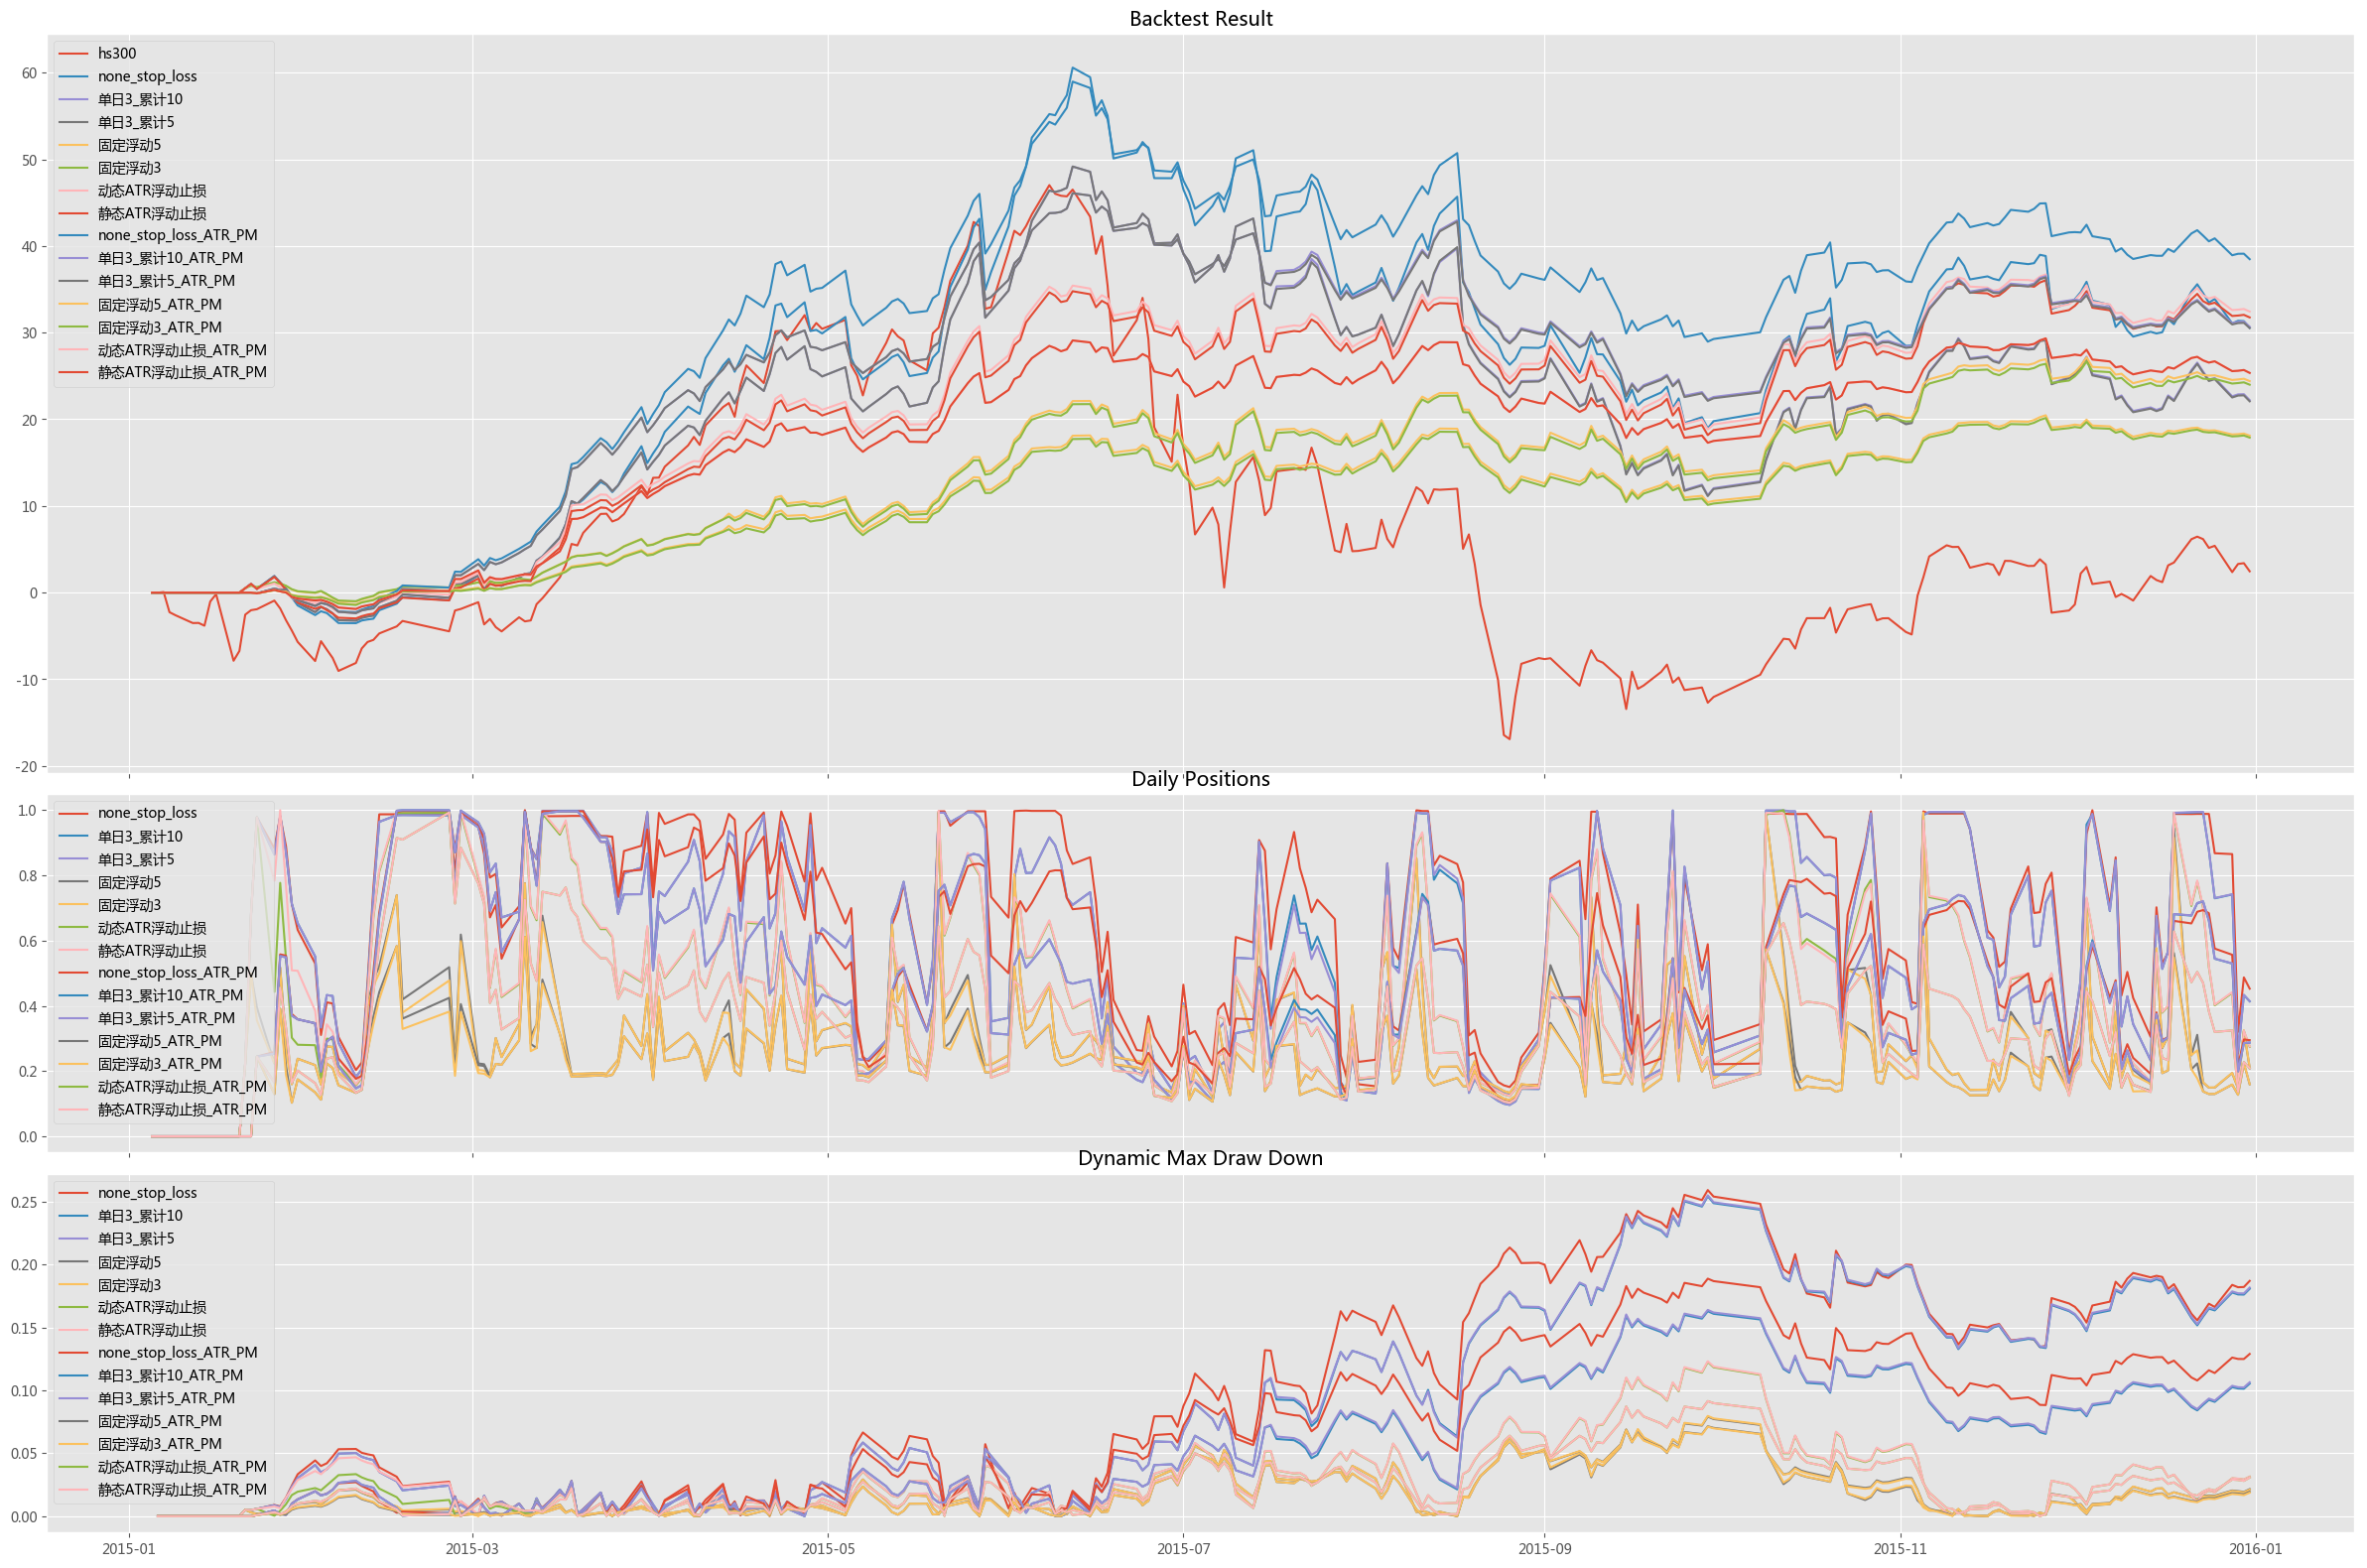

In [121]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20), dpi=100)

ax1 = plt.subplot2grid((12,8), (0,0), colspan=8, rowspan=6)
ax1.plot(df.profit[0].hs300, label='hs300')
for i in range(df.shape[0]):
    ax1.plot(df.profit[i].profit, label=df.name[i])
    
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.set(title='Backtest Result')
ax1.legend(loc='best')

ax2 = plt.subplot2grid((12,8), (6,0), colspan=8, rowspan=3, sharex=ax1)
for i in range(df.shape[0]):
    ax2.plot(df.positions[i], label=df.name[i])
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.set_title('Daily Positions')
ax2.legend(loc='upper left')

ax3 = plt.subplot2grid((12,8), (9,0), colspan=8, rowspan=3, sharex=ax1)
for i in range(df.shape[0]):
    ax3.plot(df.drawdown[i], label=df.name[i])
ax3.set_title('Dynamic Max Draw Down')
ax3.legend(loc='upper left');



In [122]:
# df.drawdown[0].plot();

In [124]:
# # line1, = plt.plot([1,2,3], label='Line 4', linestyle='--')
# # line2, = plt.plot([3,2,1], label='Line 3', linewidth=4)

# # # Create a legend for the first line.
# # plt.legend([line1, line2], ["Line 1", "Line 2"], loc='best');
# plt.plot([1,2,3], label='Line 4', linestyle='--')
# plt.plot([3,2,1], label='Line 3', linewidth=4)
# plt.legend(loc='upper right');


In [137]:
# writer = pd.ExcelWriter('backtest_save/mult_bt_result.xlsx')
# df.loc[:, col_sorted[:-6]].to_excel(writer, 'describe',float_format='%.2f')
# for i in range(df.shape[0]):
#     df.history_table[i].to_excel(writer, 'ht_'+str(i))
# writer.save()

In [134]:
# df.history_table[0]

,datetime,code,price,amount,cash
1,2015-01-21,000926,10.56,18900,9800416.00
2,2015-01-21,002546,13.37,14900,9601203.00
3,2015-01-21,002696,12.08,16500,9401883.00
4,2015-01-21,300040,8.44,23600,9202699.00
5,2015-01-21,300214,5.63,35500,9002834.00
6,2015-01-21,300360,23.60,8400,8804594.00
7,2015-01-21,600067,7.47,26700,8605145.00
8,2015-01-21,600070,8.45,23600,8405725.00
9,2015-01-21,600230,12.32,16200,8206141.00
10,2015-01-21,601515,11.69,17100,8006242.00


In [4]:
# files = glob.glob(f'{PATH}*.bt')
# excel_name = 'mult_bt.xlsx'
# mult_bt_name = 'mult_backtest.bt'
def mult_account_analysis(files, excel_name, backtest_name, is_saving_history_table=False):
    """
    files : 需要对比分析回测文件名
    excel_name : 回测结果保存为excel名字
    backtest_name : 保存为.bt文件的名字
    is_saving_history_table : 是否保存交割单到excel表
    """
    # 读取回测文件并以dataframe形式存储
    df = pd.DataFrame()
    for ind,i in enumerate(files):
#         account = load_file(f'{PATH}{i}')
        account = load_file(f'{i}')
        account['name'] = i[4:-3]

        drawdown = dynamic_max_drawdown(account['net_value'])
        annual_profit, sharpe_ratio = compute_sharpe_ratio(account['final_net_value'],
                                                           account['day_profit'])
        (cov, var_profit, var_hs300, alpha, beta, omega, ir) = compute_ir(account['day_profit'])
        account['positions'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
        account['net_value'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
        account['profit'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
        account['day_profit'].index = pd.DatetimeIndex(account['positions'].index, name ='date')
        account['drawdown'] = drawdown
        account['drawdown'].index = pd.DatetimeIndex(account['positions'].index, name ='date')

        account['annual_profit'] = annual_profit
        account['max_drawdown'] = drawdown.max()
        account['sharpe_ratio'] = sharpe_ratio

        account['ir'] = ir
        account['alpha'] = alpha
        account['beta'] = beta
        account['omega'] = omega
        account['cov'] = cov
        account['var_profit'] = var_profit
        account['var_hs300'] = var_hs300


        temp = pd.Series(account, name=ind)
        df = pd.concat([df, temp], axis=1, sort=True)
    df = df.T
    df.index.name = 'bt_id'
    
    col_sorted = ['name', 'start', 'end', 'init_assets', 'final_net_value', 'position_manage', 'stop_loss',
    'annual_profit', 'max_drawdown', 'sharpe_ratio', 'ir', 'alpha', 'beta',
    'cov', 'var_profit', 'var_hs300', 'omega',
    'positions', 'drawdown', 'net_value', 'profit', 'day_profit', 'history_table']
    df = df.loc[:, col_sorted]
    
    # 绘制收益/仓位/最大回测曲线
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(30,20), dpi=100)

    ax1 = plt.subplot2grid((12,8), (0,0), colspan=8, rowspan=6)
    ax1.plot(df.profit[0].hs300, label='hs300')
    for i in range(df.shape[0]):
        ax1.plot(df.profit[i].profit, label=df.name[i])

    plt.setp(ax1.get_xticklabels(), visible=False)
    ax1.set(title='Backtest Result')
    ax1.legend(loc='best')

    ax2 = plt.subplot2grid((12,8), (6,0), colspan=8, rowspan=3, sharex=ax1)
    for i in range(df.shape[0]):
        ax2.plot(df.positions[i], label=df.name[i])
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_title('Daily Positions')
    ax2.legend(loc='upper left')

    ax3 = plt.subplot2grid((12,8), (9,0), colspan=8, rowspan=3, sharex=ax1)
    for i in range(df.shape[0]):
        ax3.plot(df.drawdown[i], label=df.name[i])
    ax3.set_title('Dynamic Max Draw Down')
    ax3.legend(loc='upper left');
    plt.show()
    
    # 保存回测结果到excel表
    writer = pd.ExcelWriter('backtest_save/'+excel_name)
    df.loc[:, col_sorted[:-6]].to_excel(writer, 'describe',float_format='%.2f')
    if is_saving_history_table:
        for i in range(df.shape[0]):
            df.history_table[i].to_excel(writer, 'ht_'+str(i))
    writer.save()
    
    with open('backtest_save/'+backtest_name, 'wb') as f:
        pickle.dump(df, f)
        
    return df

1.6239
cov：    3.0998，var_profit：    2.6369，var_hs300：    6.1310，beta：    0.5056，omega：   16.1886，alpha：   22.7462，ir：    1.4051
1.49
cov：    2.7526，var_profit：    2.2202，var_hs300：    6.1310，beta：    0.4490，omega：   15.5301，alpha：   15.9044，ir：    1.0241
1.4894
cov：    2.7460，var_profit：    2.2182，var_hs300：    6.1310，beta：    0.4479，omega：   15.5602，alpha：   15.7939，ir：    1.0150
0.792
cov：    1.4973，var_profit：    0.6272，var_hs300：    6.1310，beta：    0.2442，omega：    8.0050，alpha：   16.8520，ir：    2.1052
0.789
cov：    1.4945，var_profit：    0.6225，var_hs300：    6.1310，beta：    0.2438，omega：    7.9540，alpha：   16.5140，ir：    2.0762
1.0722
cov：    1.9889，var_profit：    1.1496，var_hs300：    6.1310，beta：    0.3244，omega：   11.1171，alpha：   23.3340，ir：    2.0989
1.0836
cov：    2.0127，var_profit：    1.1741，var_hs300：    6.1310，beta：    0.3283，omega：   11.2157，alpha：   22.8282，ir：    2.0354
1.1965
cov：    2.2388，var_profit：    1.4315，var_hs300：    6.1310，beta：    0.3652，omega：   12.2652，alp

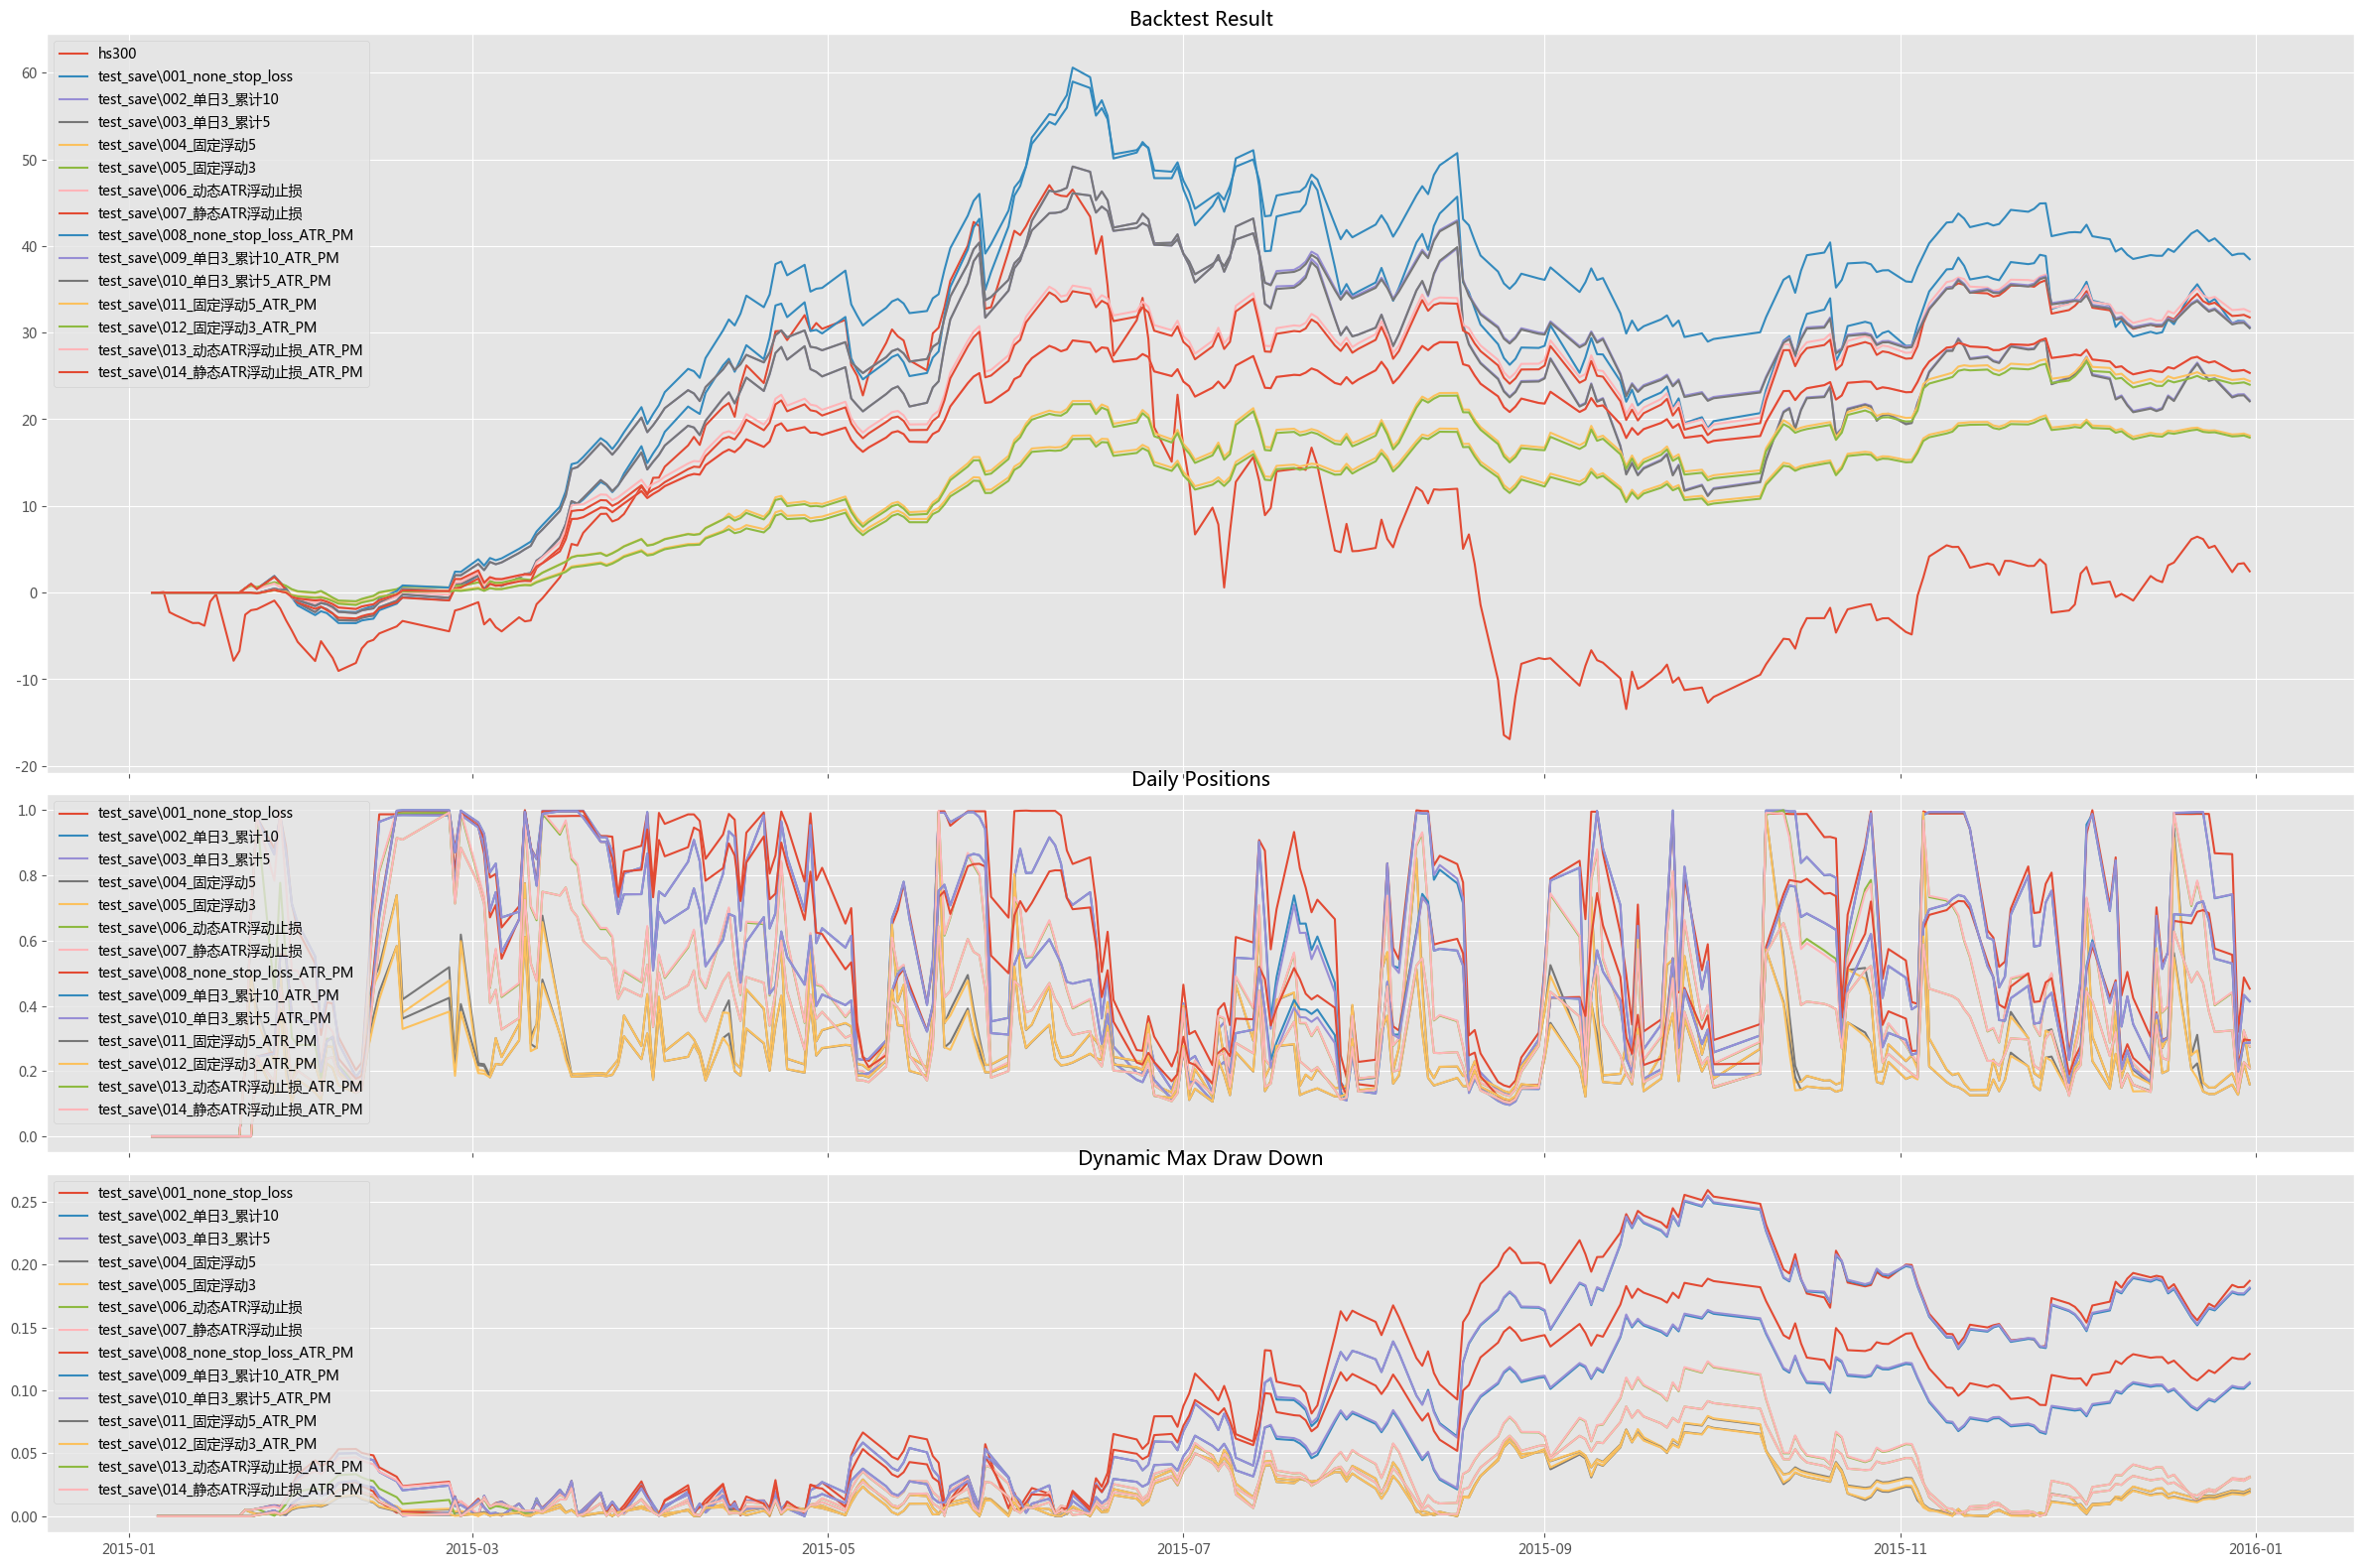

In [5]:
files = glob.glob(f'{PATH}*.bt')
excel_name = 'mult_bt.xlsx'
mult_bt_name = 'mult_backtest.mbt'
df_mult = mult_account_analysis(files, excel_name, mult_bt_name)

In [1]:
from database import DB_CONN

In [5]:
import pandas as pd

In [2]:
daily = DB_CONN['daily']

In [81]:
code = '002807'
start = '2015-01-01'
end = '2018-01-01'

In [82]:
cursor = daily.find(
    {'code':code, 'date':{'$gte':start, '$lte':end}, 'index':False},
    projection={'code':True, 'date':True, 'open':True, 'close':True, 'pre_close':True,
               'high_limit':True, 'low_limit':True, 'high':True, 'low':True, '_id':False}
)

In [84]:
df_res = pd.DataFrame([r for r in cursor])
df_res = df_res.loc[:, ['code', 'date', 'open','close', 'pre_close','high','high_limit','low','low_limit']]

In [85]:
df_res.head()

,code,date,open,close,pre_close,high,high_limit,low,low_limit
0,002807,2016-09-02,5.99,6.68,NaN,6.68,6.68,5.99,2.97
1,002807,2016-09-05,7.35,7.35,6.68,7.35,7.35,7.35,6.01
2,002807,2016-09-06,8.09,8.09,7.35,8.09,8.09,8.09,6.62
3,002807,2016-09-07,8.90,8.90,8.09,8.90,8.90,8.90,7.28
4,002807,2016-09-08,9.79,9.79,8.90,9.79,9.79,9.79,8.01


In [44]:
print(8.81 * 1.05)
print(8.81 * 0.95)

9.2505
8.3695


In [26]:
daily_hfq = DB_CONN['daily_hfq']

In [27]:
hfq_cursor = daily.find(
    {'code':code, 'date':{'$gte':start, '$lte':end}, 'index':False},
    projection={'code':True, 'date':True, 'open':True, 'close':True,
                'au_factor':True, '_id':False}
)

In [28]:
df_hfq = pd.DataFrame([r for r in hfq_cursor])

In [29]:
df_hfq.head()

,au_factor,close,code,date,open
0,6.31,14.29,300257,2018-01-02,14.10
1,6.31,14.29,300257,2018-01-03,14.26
2,6.31,14.24,300257,2018-01-04,14.21
3,6.31,13.94,300257,2018-01-05,14.24
4,6.31,14.07,300257,2018-01-08,13.91


In [35]:
import tushare as ts
all_codes = ts.get_stock_basics().index.tolist()

In [37]:
all_codes.index(code)

3359